In [1]:
from __future__ import print_function
import json
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
json_data=open('../json.data/contest_v1.json')
data = json.load(json_data)
json_data.close()

In [3]:
len(data)

8048

In [4]:
data[0]

{'filename': '1542501099.cpp',
 'nloc': 28,
 'token_count': 285,
 'problem': 'https://www.codeforces.com/contest/868/problem/B',
 'solution': 'https://www.codeforces.com/contest/868/submission/45891140',
 'exec_time': '31 ms',
 'memory': '300 KB',
 'usertype': 'Candidate',
 'function_count': 1,
 'library_count': 1,
 'used_headers': 1,
 'macro_count': 10,
 'used_macros': 5,
 'function_details': [{'cyclomatic_complexity': 18,
   'nloc': 18,
   'token_count': 222,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 33,
   'end_line': 67,
   'parameters': [],
   'filename': '1542501099.cpp',
   'top_nesting_level': 0,
   'length': 35,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [16]:
set1 = set([])
data_uniq = []
for x in data:
    if x['solution'] not in set1:
        set1.add(x['solution'])
        data_uniq.append(x)
data = data_uniq[:]
print(len(data))

7943


In [111]:
function_count = []
nloc = []
token_count = []
library_count = []
used_library = []
used_library_per = []
macro_count = []
usertype = []
main_cat = ['Expert','Master','Newbie','Pupil','Specialist','Unrated,','Candidate','International']
main_div1 = ['Expert','Master','Candidate','International']
main_div2 = ['Newbie','Pupil','Specialist']
userdiv = []
for x in data:
    if x['token_count'] > 0 and x['usertype'] in main_cat:
        function_count.append(x['function_count'])
        nloc.append(x['nloc'])
        token_count.append(x['token_count'])
        macro_count.append(x['macro_count'])
        library_count.append(x['library_count'])
        used_library.append(x['used_headers'])
        used_library_per.append(0 if x['library_count']==0 else (x['used_headers']/x['library_count'])*100)
        usertype.append(x['usertype'])
        if x['usertype'] in main_div1:
            userdiv.append('Div 1')
        else:
            userdiv.append('Div 2')

In [95]:
for each in main_cat:
    print(each,usertype.count(each))

Expert 1859
Master 437
Newbie 411
Pupil 1070
Specialist 1639
Unrated, 903
Candidate 1113
International 241


In [96]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [97]:
def plot_data_2D(X,Y,title='title',color='b'):
    plt.scatter(X,Y,c=color,alpha=0.1)
    plt.title(title)

In [98]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [99]:
def stat_display(data):
    stat_data = stats.describe(data)
    print ('min : ' , stat_data.minmax[0])
    print ('max : ' , stat_data.minmax[1])
    print ('mean : ' , stat_data.mean)
    print ('variance : ' , stat_data.variance)
    print ('skewness : ' , stat_data.skewness)
    print ('kurtosis : ' , stat_data.kurtosis)

In [100]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [101]:
def find_min_json(arr):
    return data[np.argmin(arr)]

In [102]:
def plot_data_1D_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    Y = []
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hlines(1,1,np.max(data)+np.max(data)*0.5)
        
        Y = np.ones(len(data))
        
        ax[i].plot(data,Y,'|',ms = 40,c = c[i%6],label=x)
        ax[i].legend(loc="upper right")
    plt.title(title,y=len(set(C))+2)

In [103]:
def plot_data_2D_cat(X,Y,C,title='Title'):
    c = ['b','r','m','g','c','y']
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    cat = []
    plot = []
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        point = []
        for y,z,w in zip(X,Y,C):
            if w == x:
                data.append(y)
                point.append(z)
    
        l = ax[i].scatter(data,point,c=c[i%6],alpha=0.2)
        plot.append(l)
        cat.append(x)
    plt.title(title,y=len(set(C))+2) 
    plt.legend(plot,cat,bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

In [123]:
def plot_frequency_cat(X,C,title='Title'):
    c = ['b','r','m','g','c','y']
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left',label=x,color=c[i%6])
        ax[i].legend(prop={'size':10})
    plt.title(title,y=2.4)
#     plt.legend(plot,cat)

In [105]:
def box_plot_cat(X,C,title='Title'):
    l = [[]]*len(set(C))
    label = [[]]*len(set(C))
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        l[i] = data
        label[i] = x
    fig = plt.figure(1, figsize=(9, 6))
    plt.title(title)
    ax = fig.add_subplot(111)
    bp = ax.boxplot(l)
    ax.set_xticklabels(label)

In [106]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[9.0, 12.0]


[9.0, 12.0]

In [107]:
stat_display(library_count)

min :  0
max :  75
mean :  3.645901212042226
variance :  30.257939727987324
skewness :  3.947655934144646
kurtosis :  28.107717746835995


In [108]:
stat_display(used_library)

min :  0
max :  58
mean :  1.665841261566532
variance :  11.607562173443243
skewness :  8.116330690468232
kurtosis :  94.11819022671865


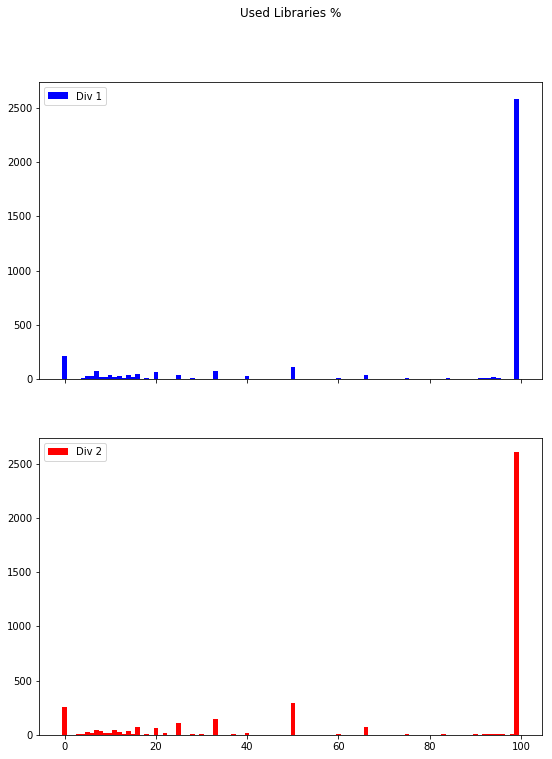

In [124]:
plot_frequency_cat(used_library_per,userdiv,'Used Libraries %')

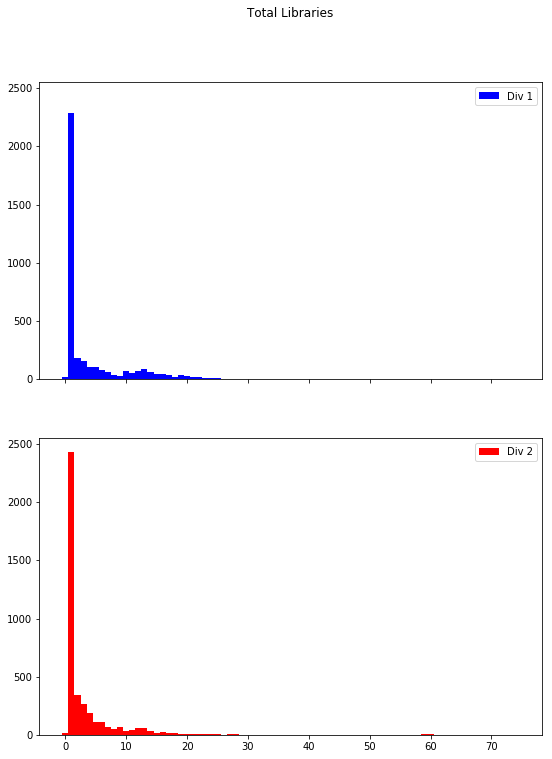

In [125]:
plot_frequency_cat(library_count,userdiv,'Total Libraries')

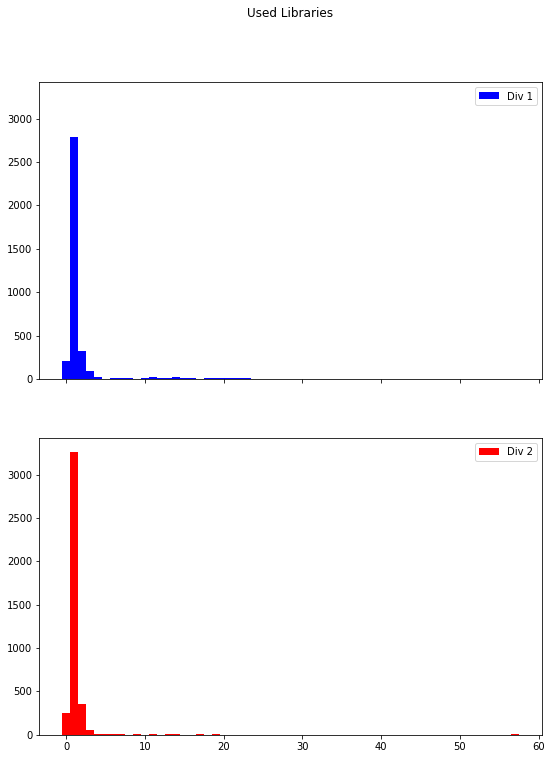

In [126]:
plot_frequency_cat(used_library,userdiv,'Used Libraries')

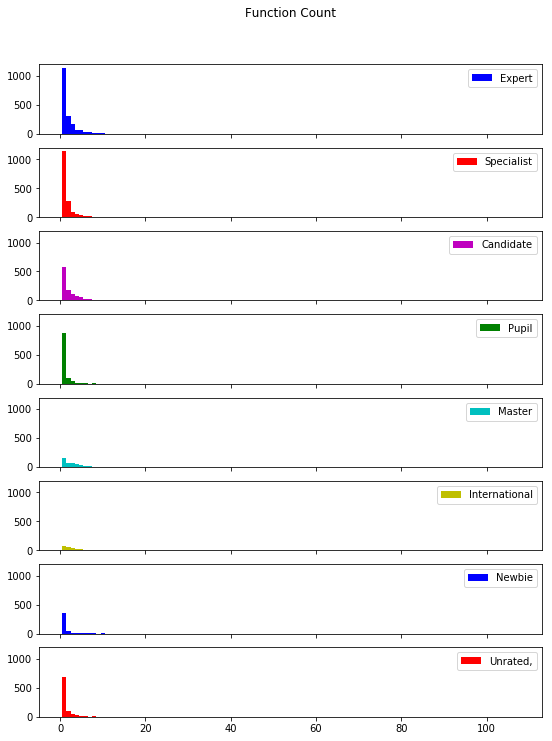

In [36]:
plot_frequency_cat(function_count,usertype,'Function Count')

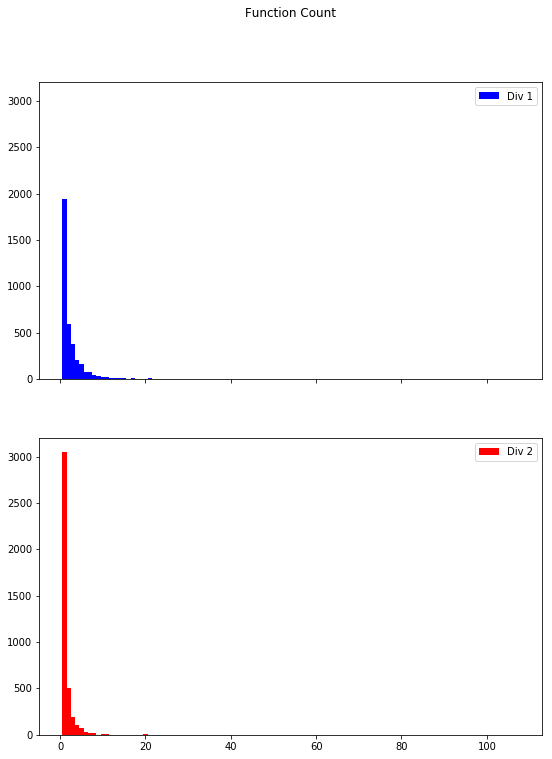

In [127]:
plot_frequency_cat(function_count,userdiv,'Function Count')

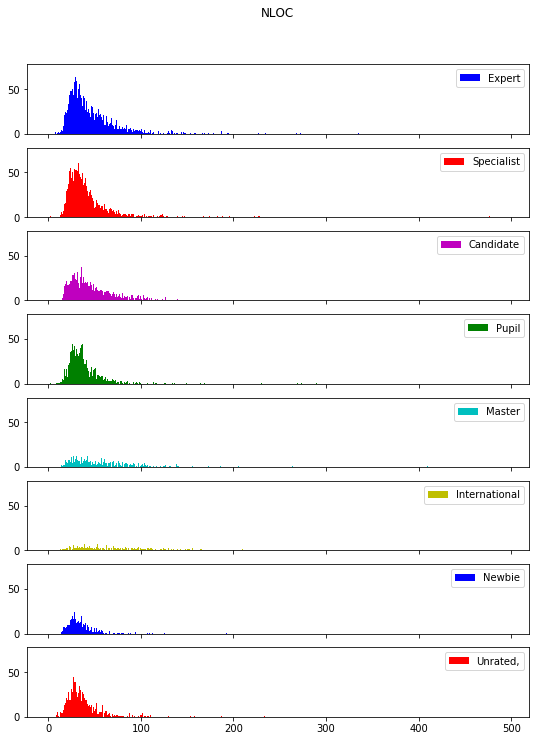

In [38]:
plot_frequency_cat(nloc,usertype,'NLOC')

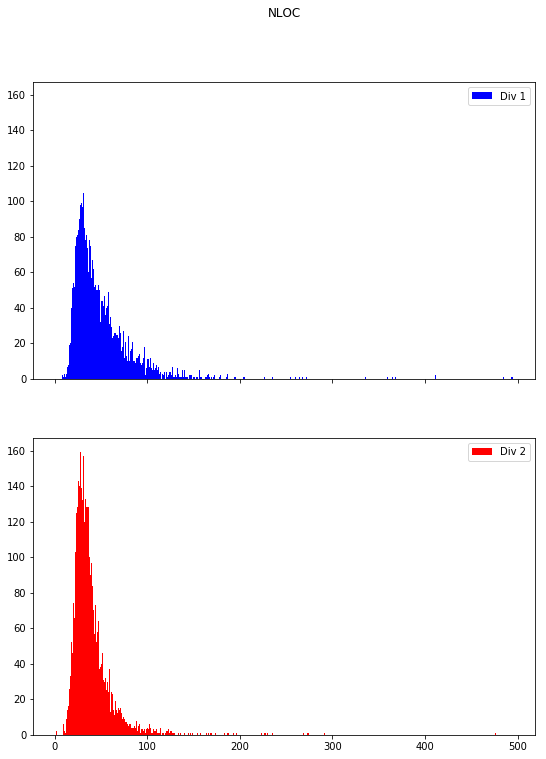

In [128]:
plot_frequency_cat(nloc,userdiv,'NLOC')

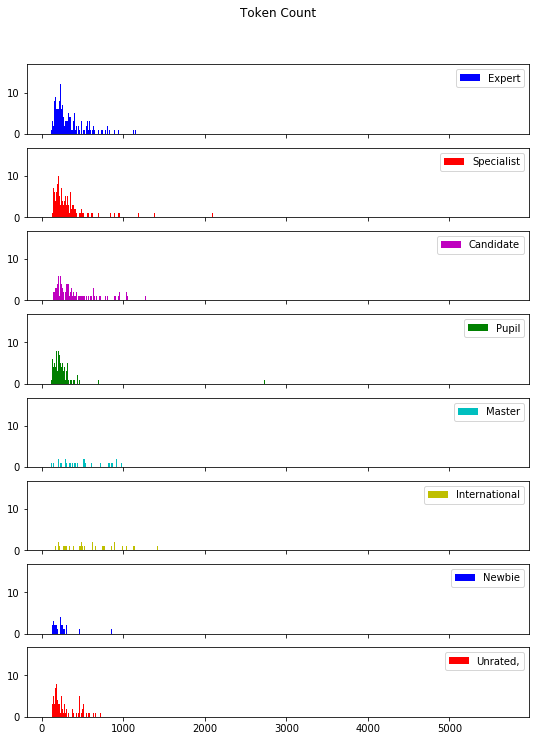

In [40]:
plot_frequency_cat(token_count,usertype,'Token Count')

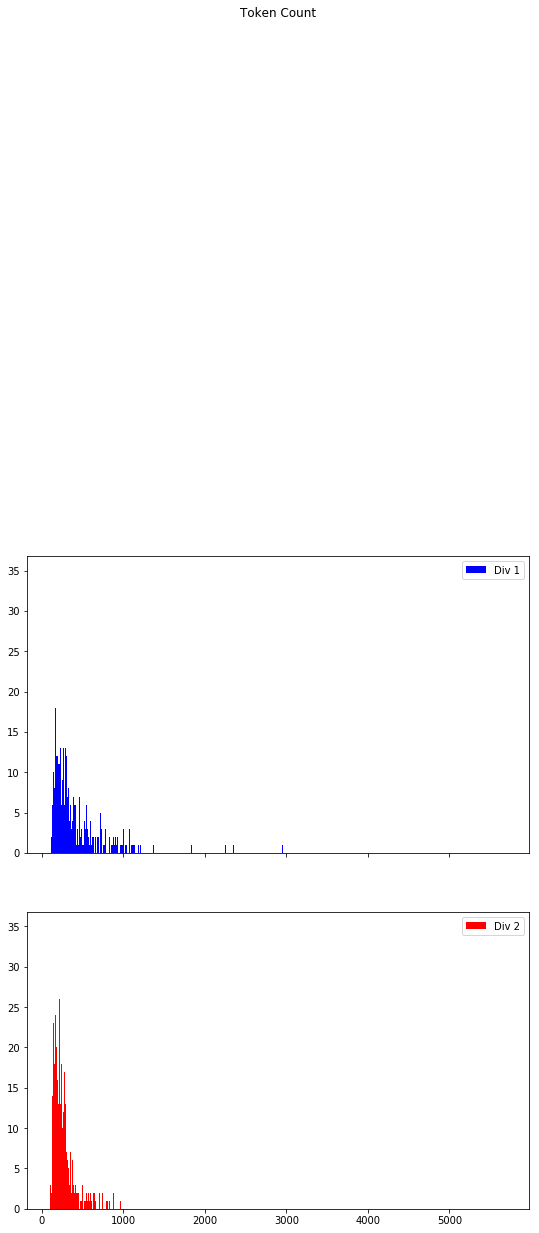

In [41]:
plot_frequency_cat(token_count,userdiv,'Token Count')

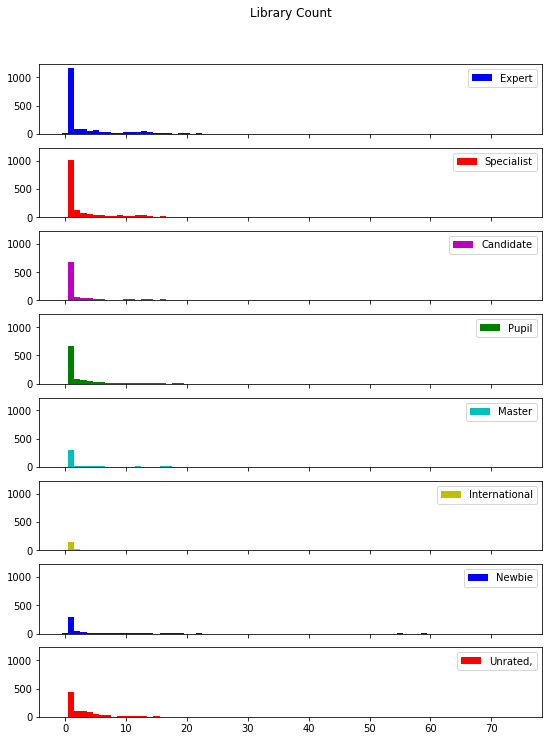

In [42]:
plot_frequency_cat(library_count,usertype,'Library Count')

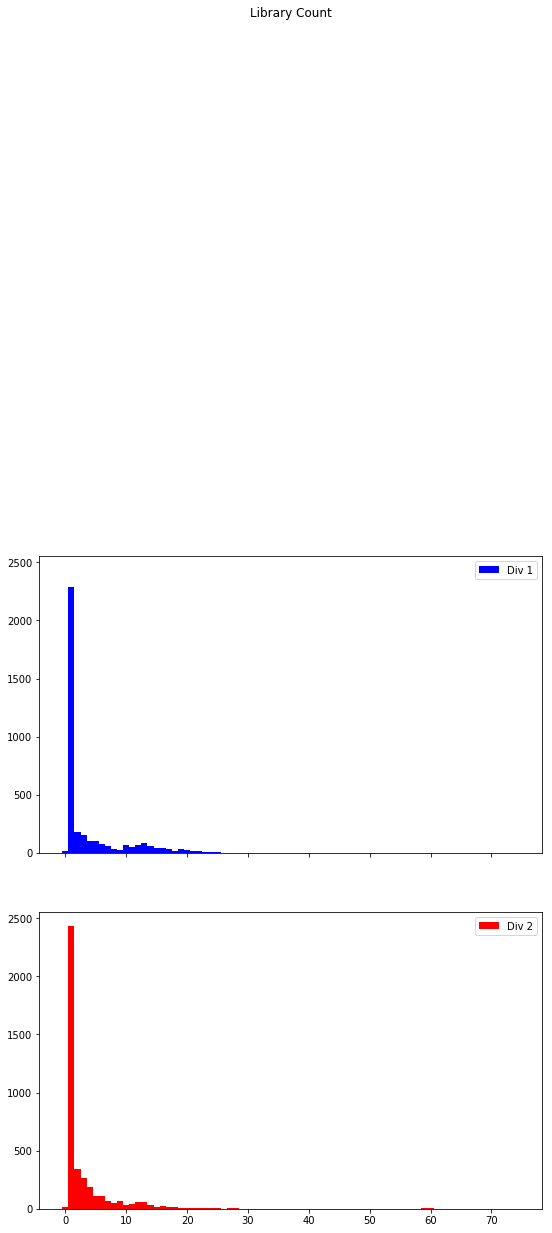

In [43]:
plot_frequency_cat(library_count,userdiv,'Library Count')

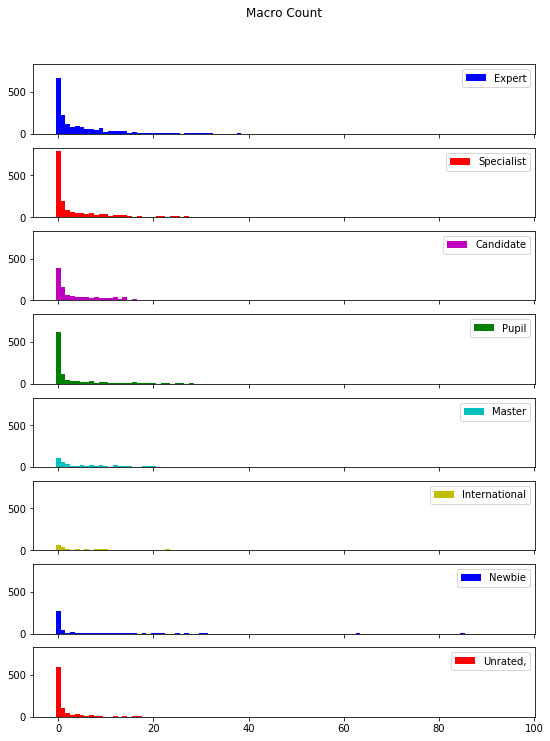

In [44]:
plot_frequency_cat(macro_count,usertype,'Macro Count')

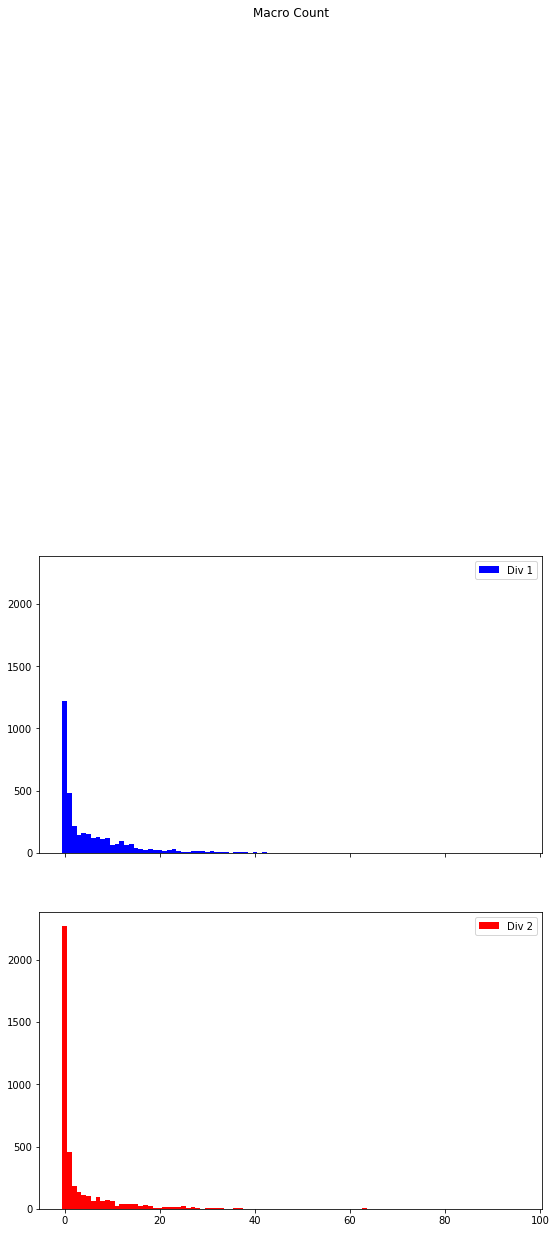

In [45]:
plot_frequency_cat(macro_count,userdiv,'Macro Count')

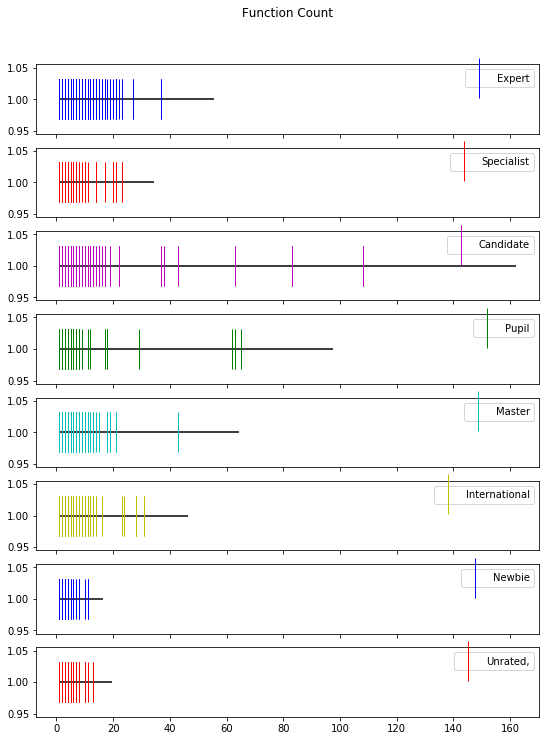

In [46]:
plot_data_1D_cat(function_count,usertype,title='Function Count')

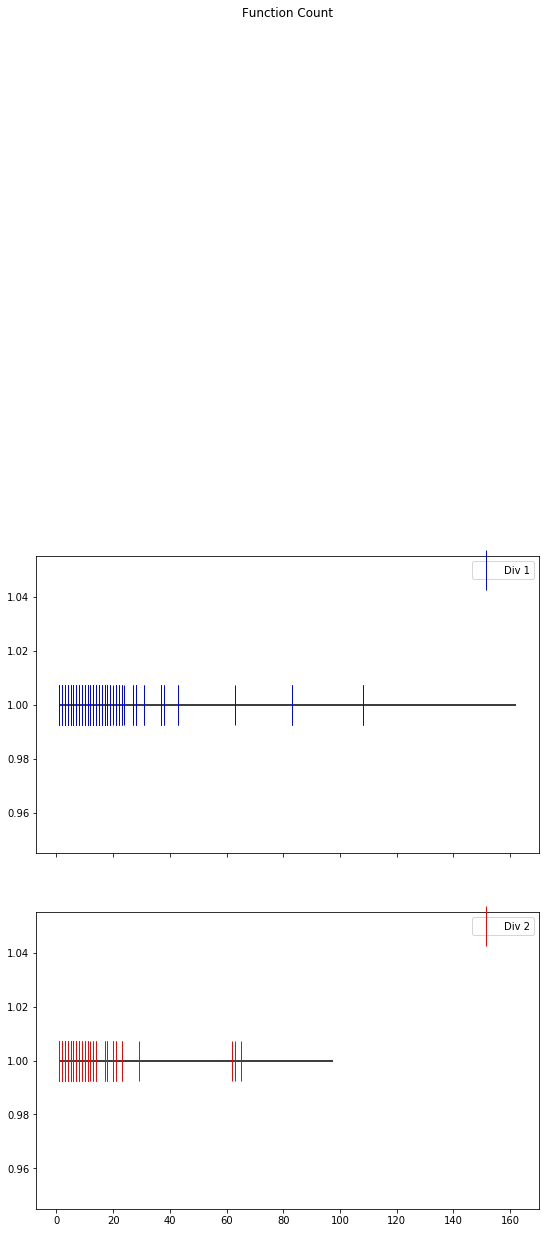

In [47]:
plot_data_1D_cat(function_count,userdiv,title='Function Count')

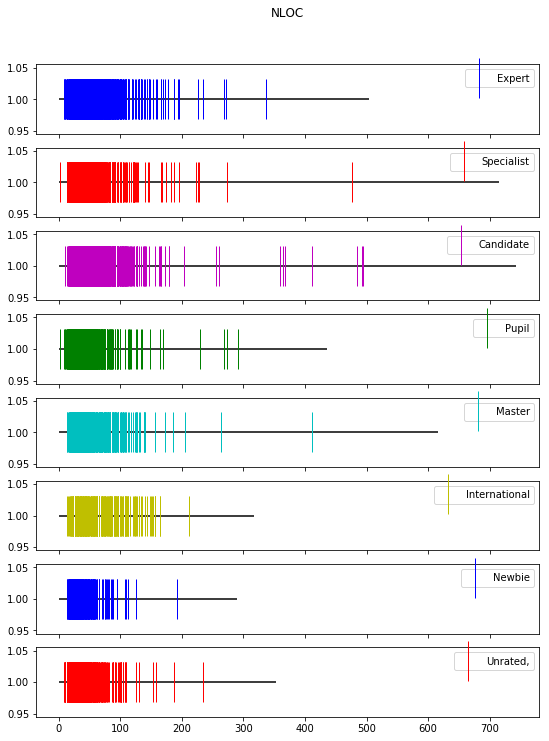

In [48]:
plot_data_1D_cat(nloc,usertype,title='NLOC')

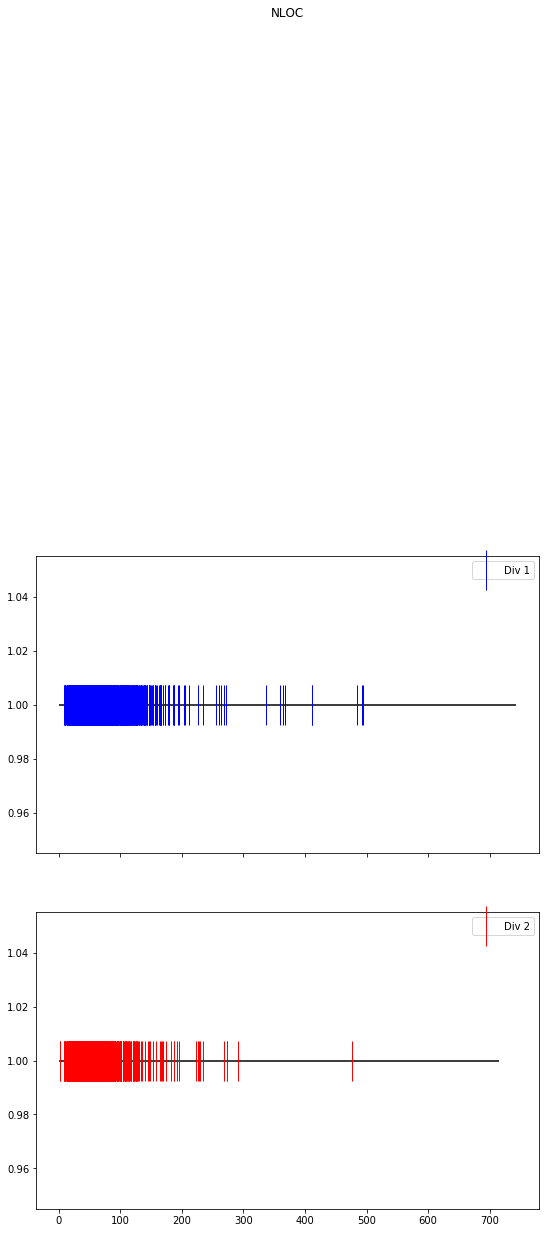

In [49]:
plot_data_1D_cat(nloc,userdiv,title='NLOC')

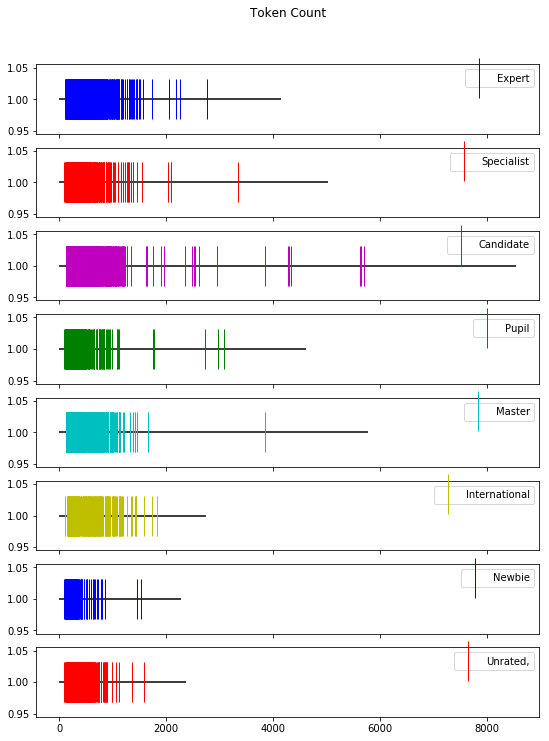

In [50]:
plot_data_1D_cat(token_count,usertype,title='Token Count')

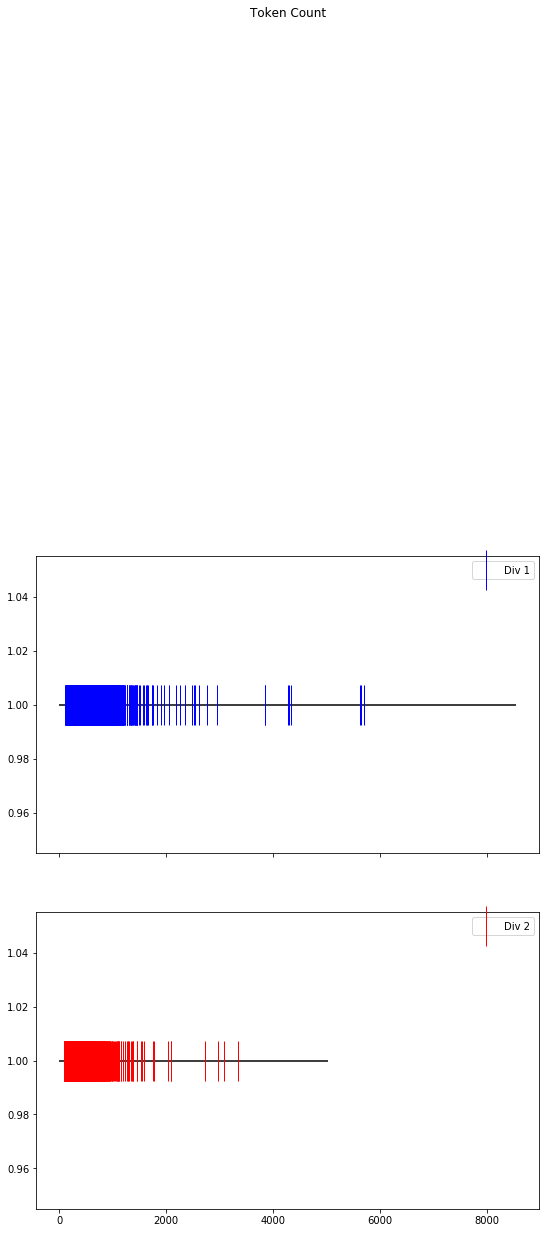

In [51]:
plot_data_1D_cat(token_count,userdiv,title='Token Count')

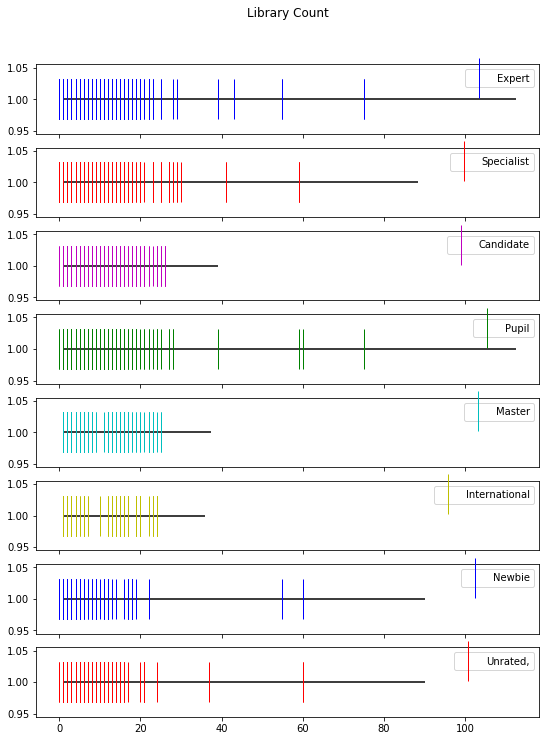

In [52]:
plot_data_1D_cat(library_count,usertype,title='Library Count')

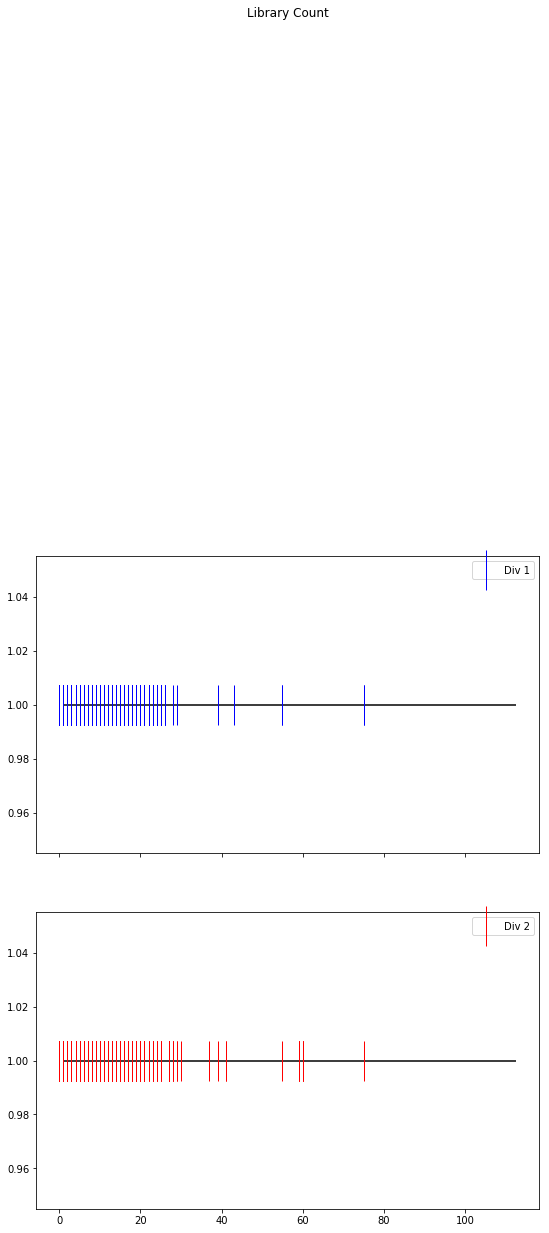

In [53]:
plot_data_1D_cat(library_count,userdiv,title='Library Count')

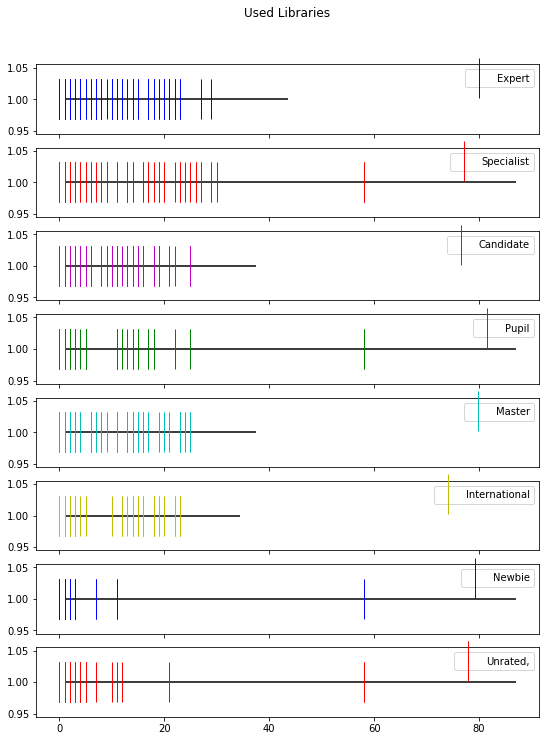

In [54]:
plot_data_1D_cat(used_library,usertype,'Used Libraries')

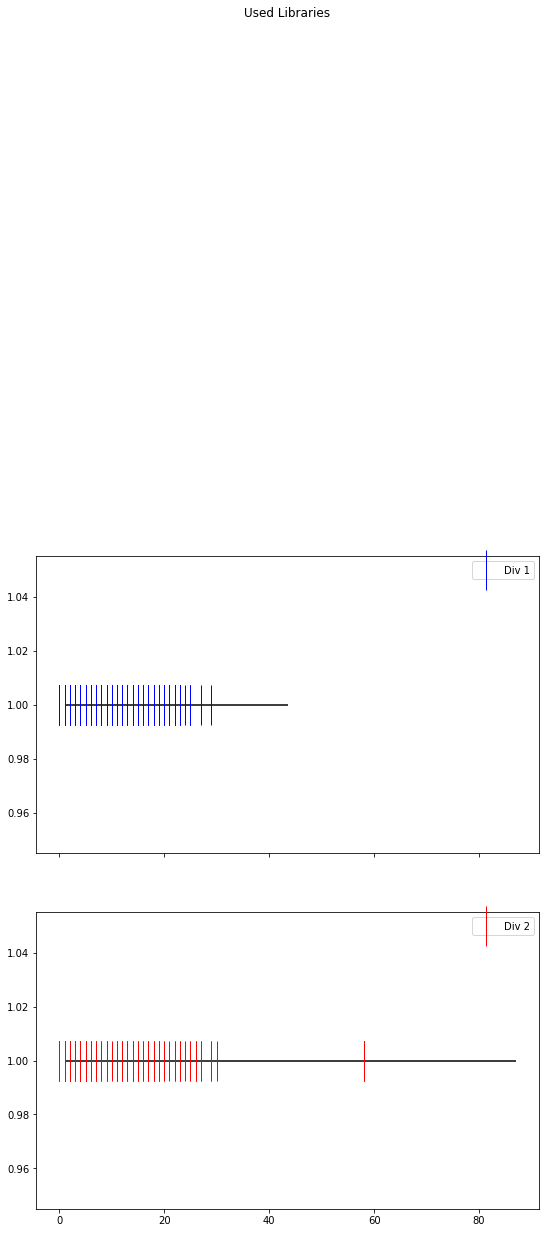

In [55]:
plot_data_1D_cat(used_library,userdiv,'Used Libraries')

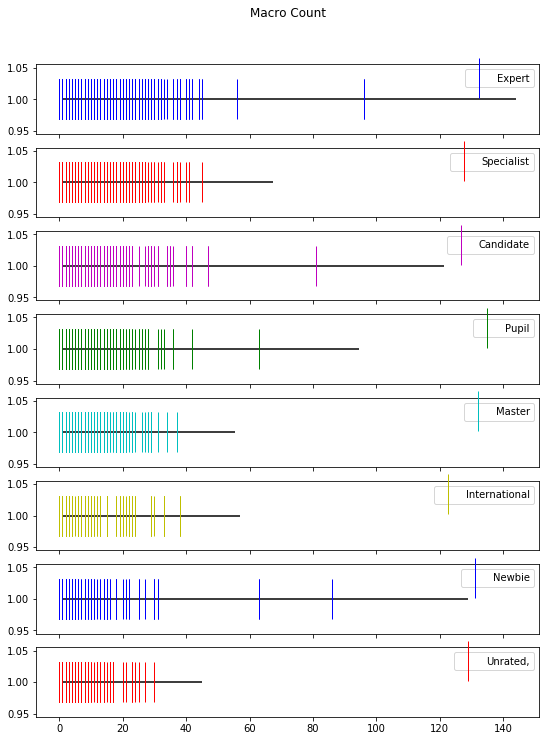

In [56]:
plot_data_1D_cat(macro_count,usertype,title='Macro Count')

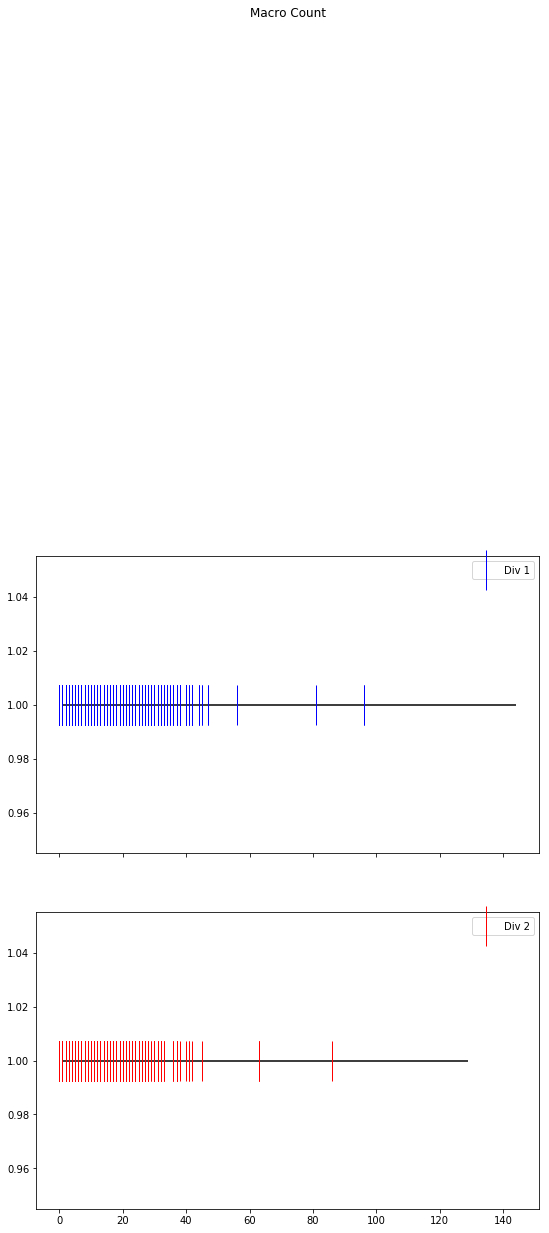

In [57]:
plot_data_1D_cat(macro_count,userdiv,title='Macro Count')

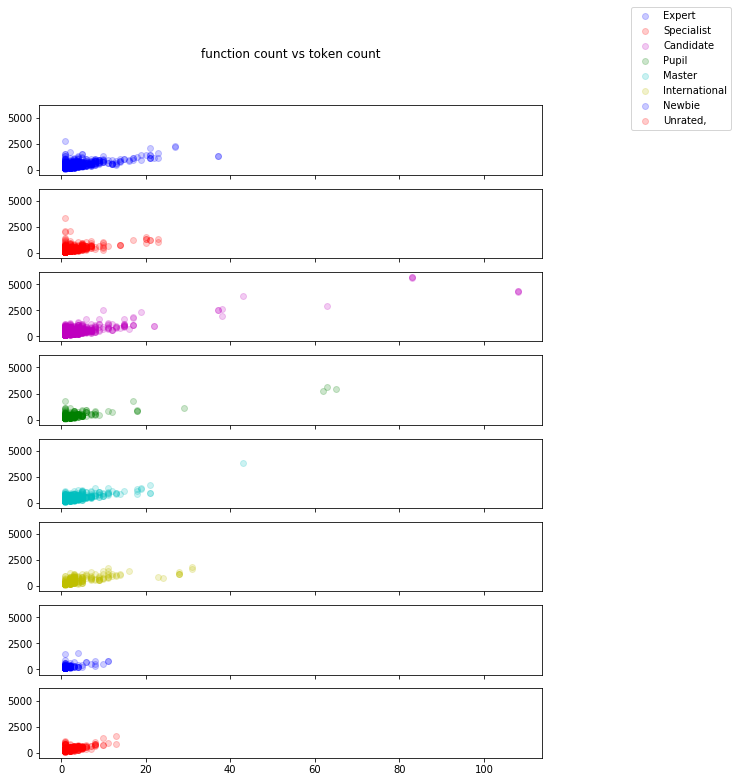

In [58]:
plot_data_2D_cat(function_count,token_count,usertype,'function count vs token count')

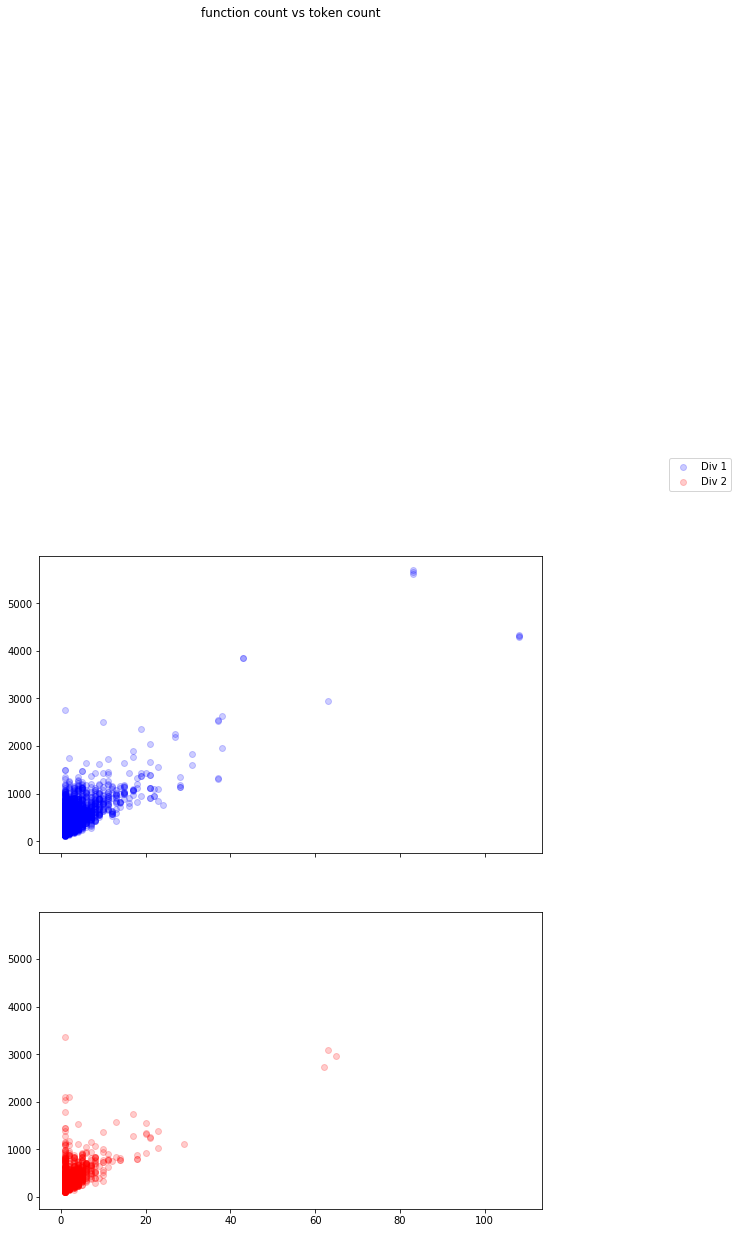

In [59]:
plot_data_2D_cat(function_count,token_count,userdiv,'function count vs token count')

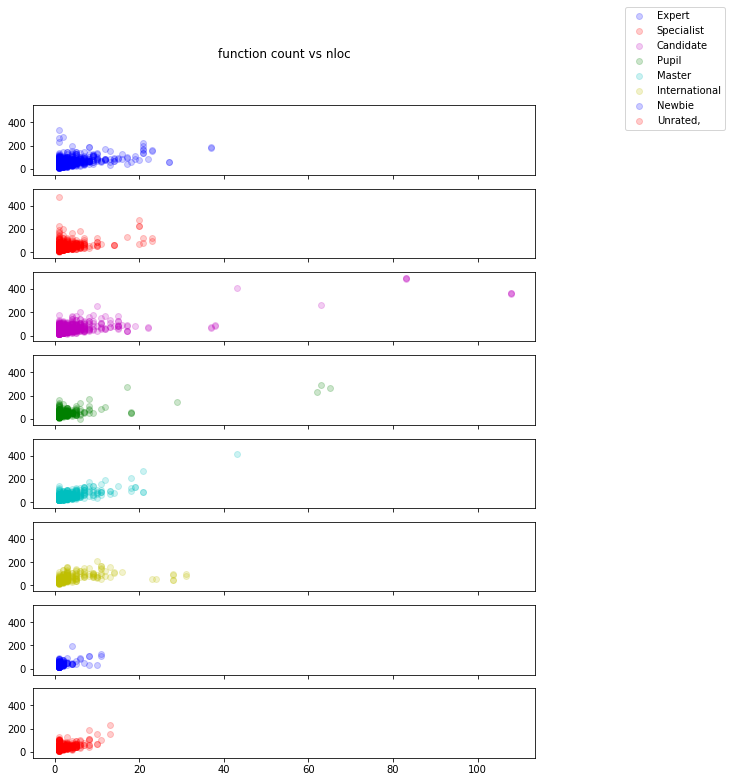

In [60]:
plot_data_2D_cat(function_count,nloc,usertype,'function count vs nloc')

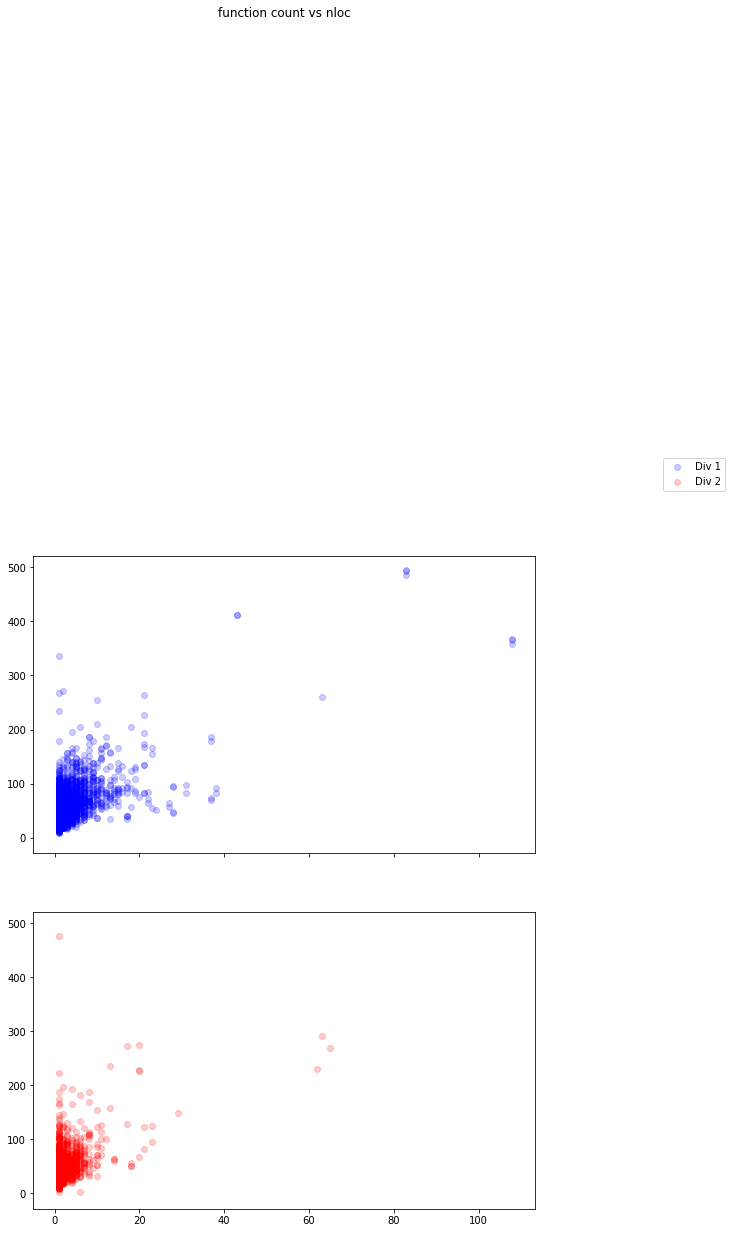

In [61]:
plot_data_2D_cat(function_count,nloc,userdiv,'function count vs nloc')

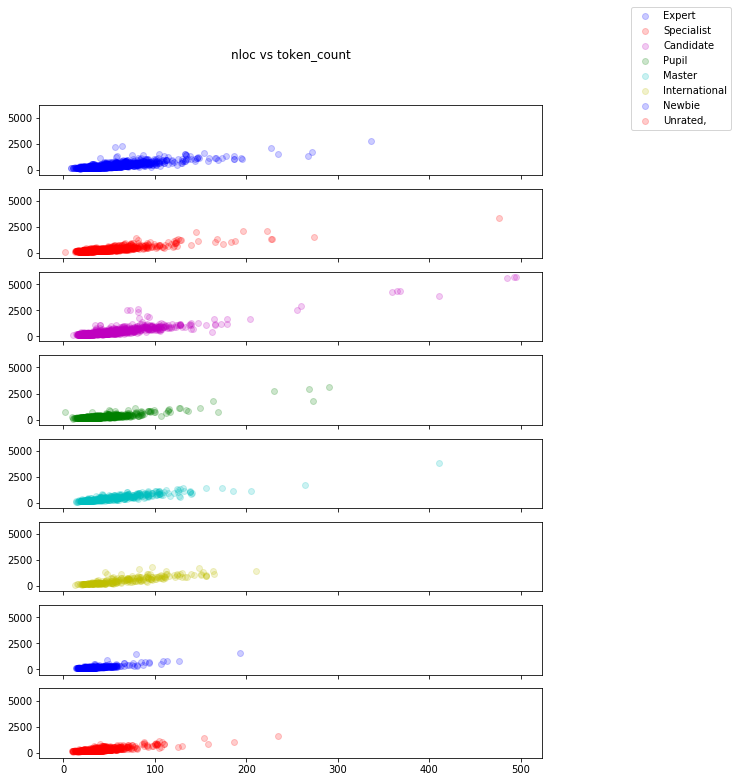

In [62]:
plot_data_2D_cat(nloc,token_count,usertype,'nloc vs token_count')

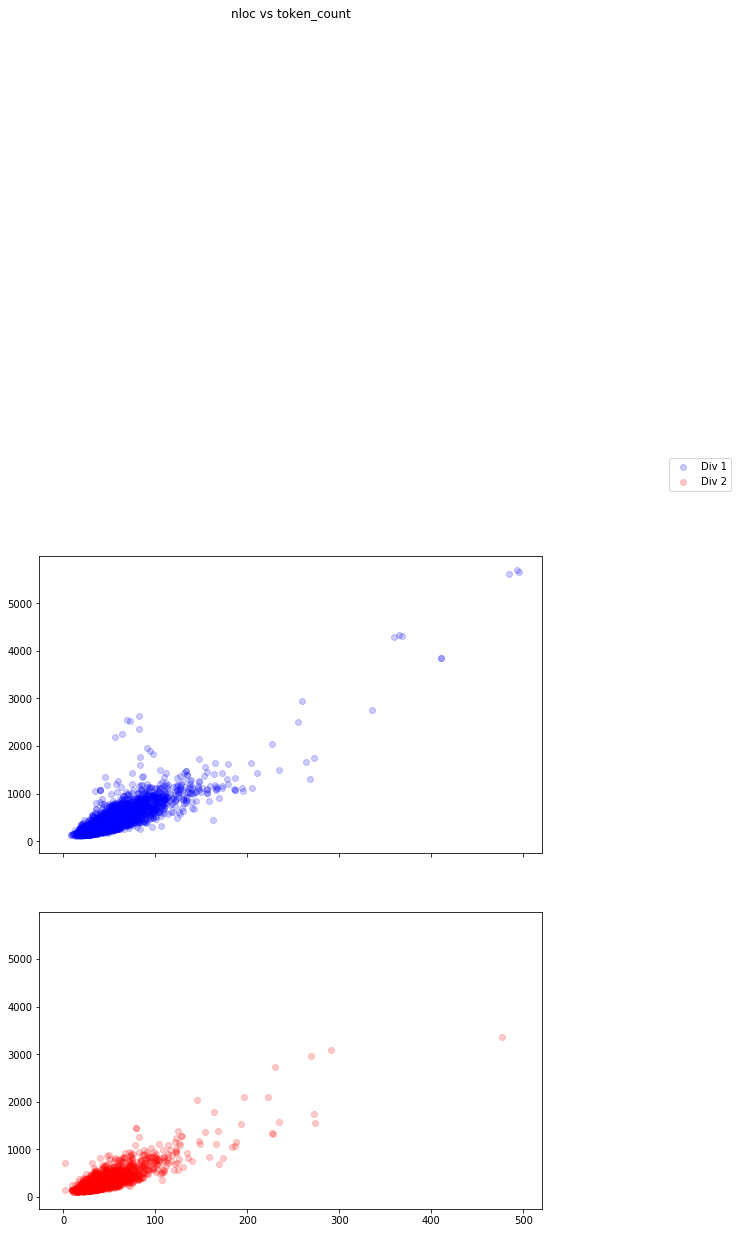

In [63]:
plot_data_2D_cat(nloc,token_count,userdiv,'nloc vs token_count')

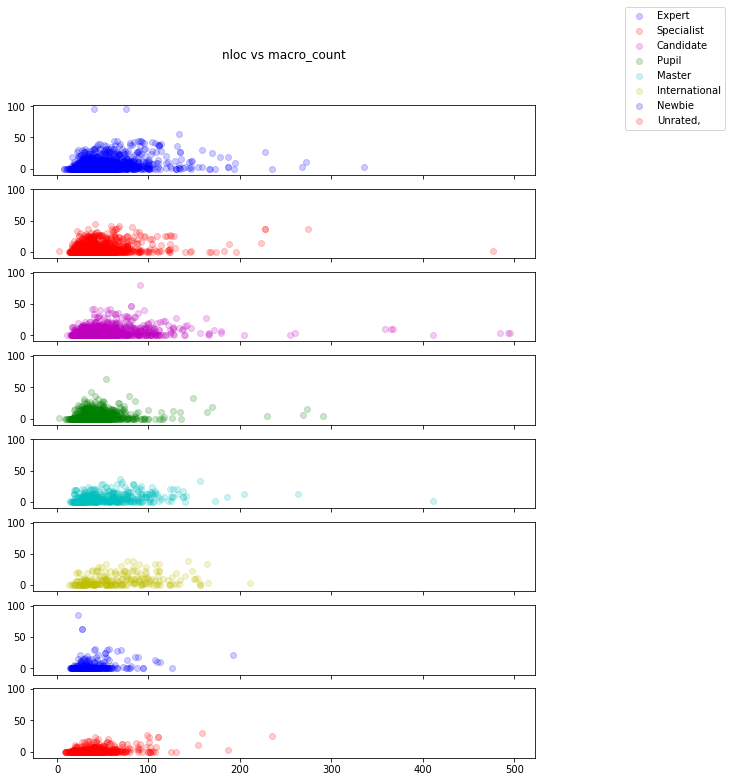

In [64]:
plot_data_2D_cat(nloc,macro_count,usertype,'nloc vs macro_count')

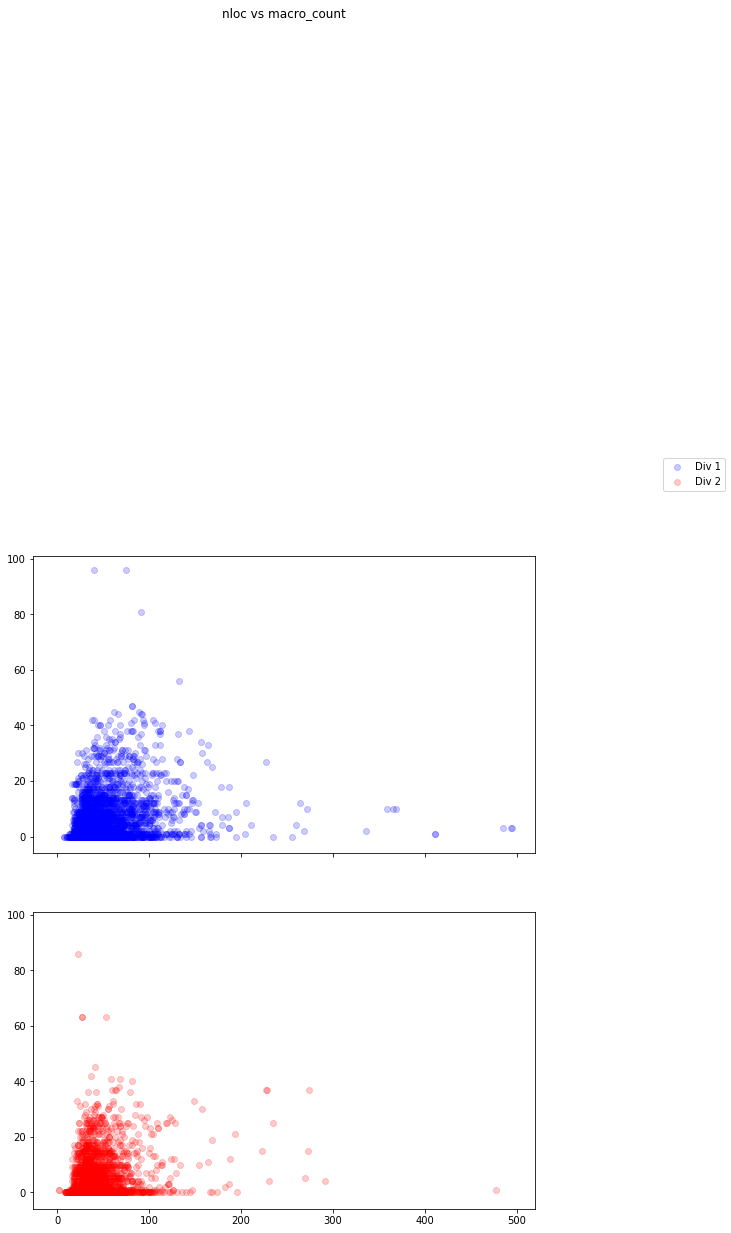

In [65]:
plot_data_2D_cat(nloc,macro_count,userdiv,'nloc vs macro_count')

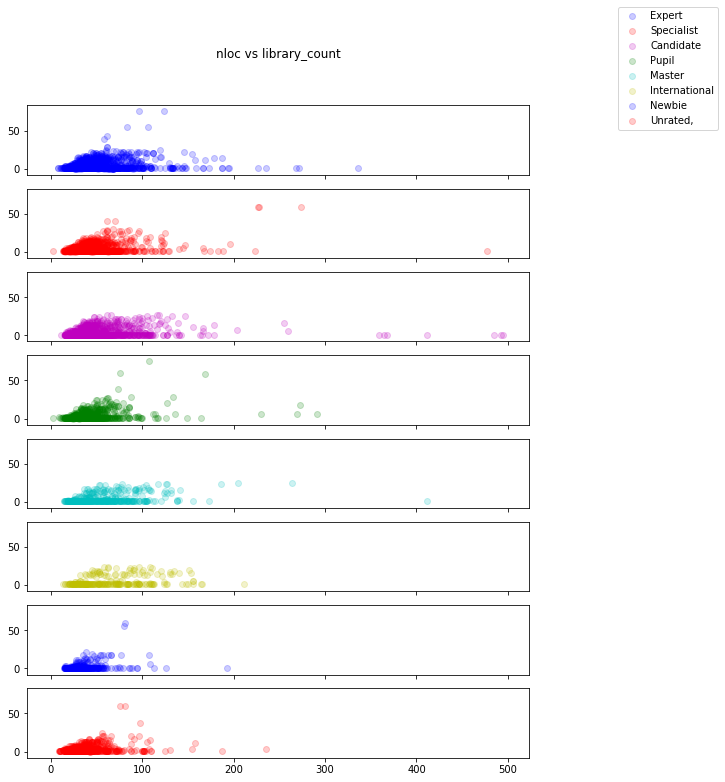

In [66]:
plot_data_2D_cat(nloc,library_count,usertype,'nloc vs library_count')

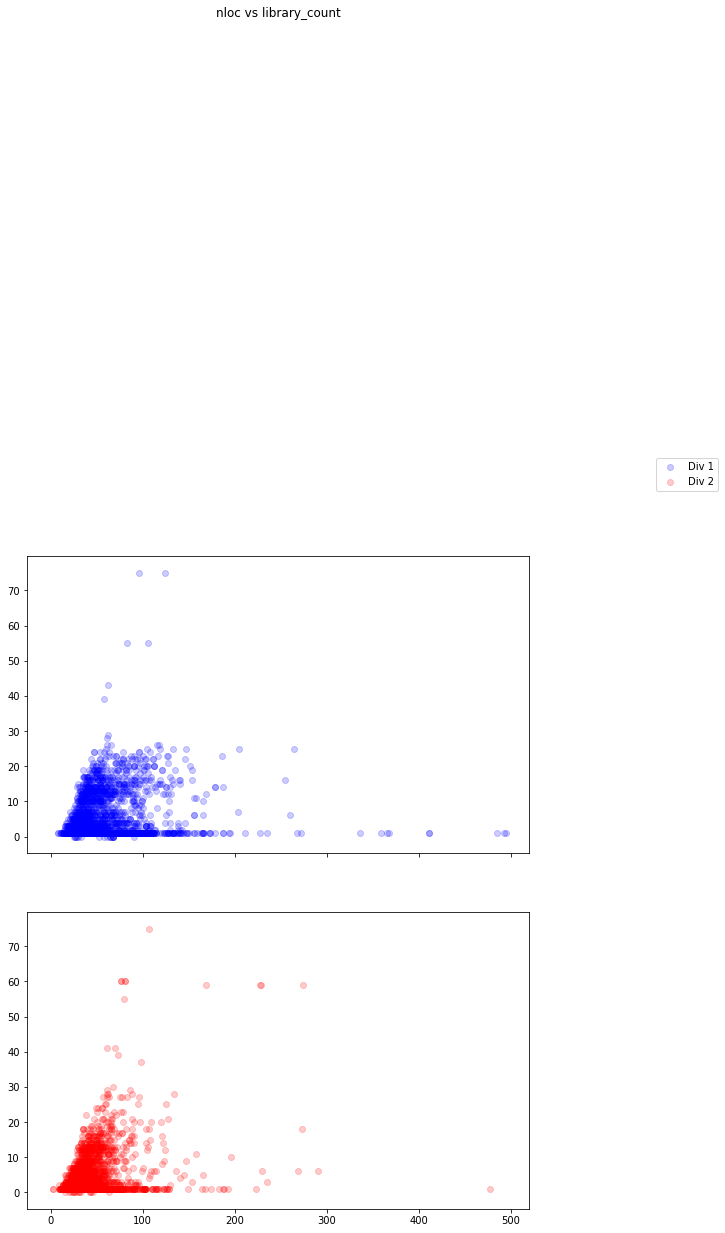

In [67]:
plot_data_2D_cat(nloc,library_count,userdiv,'nloc vs library_count')

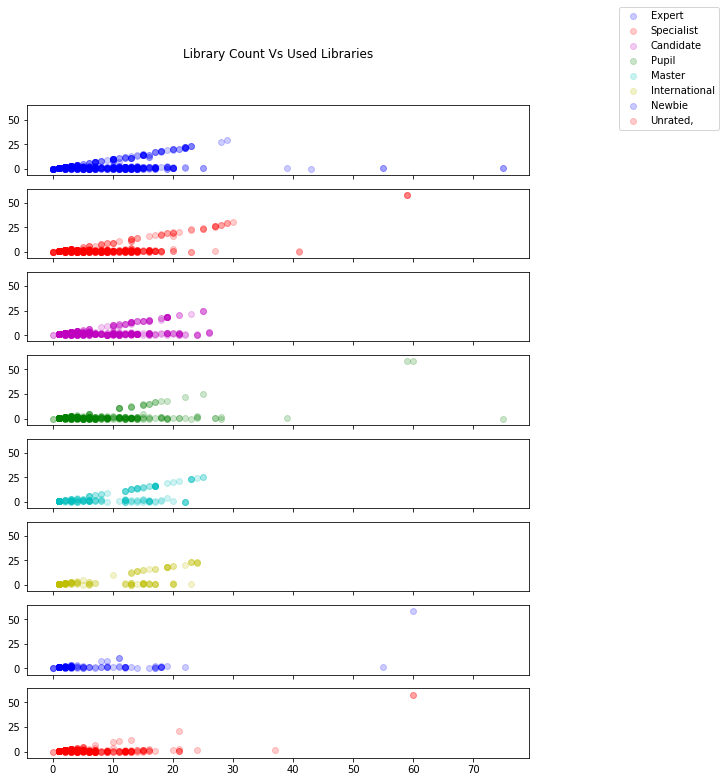

In [68]:
plot_data_2D_cat(library_count,used_library,usertype,'Library Count Vs Used Libraries')

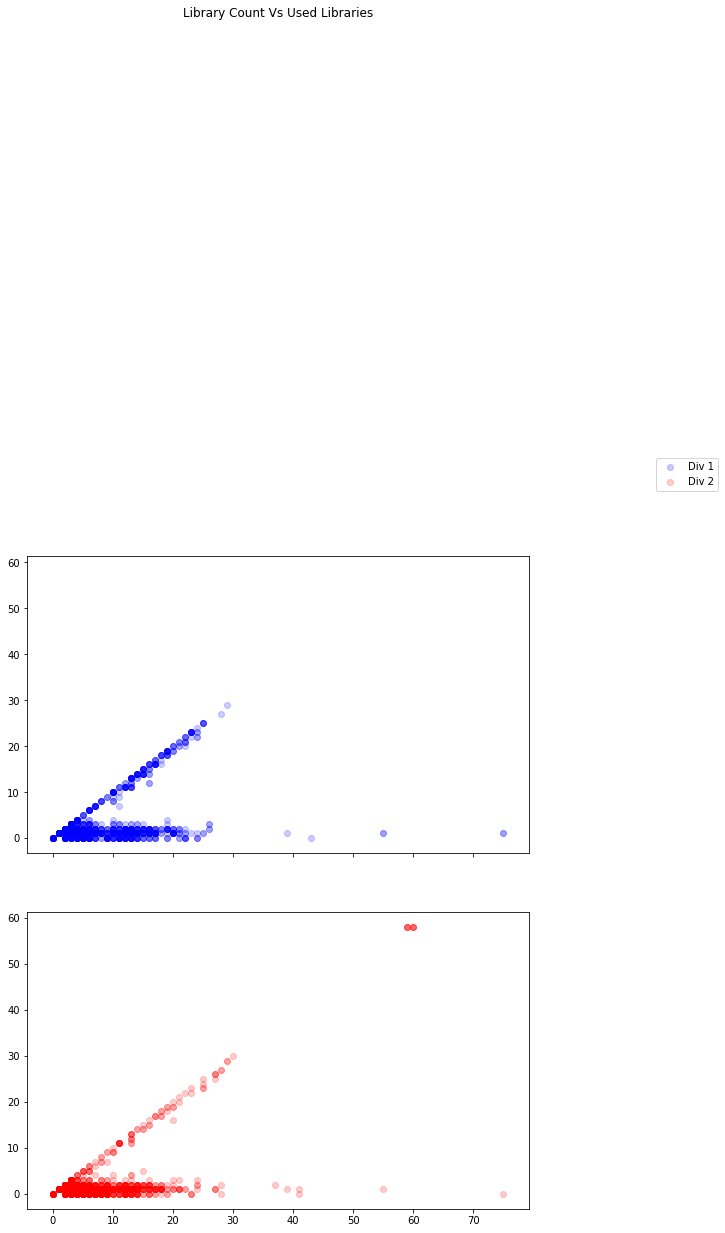

In [69]:
plot_data_2D_cat(library_count,used_library,userdiv,'Library Count Vs Used Libraries')

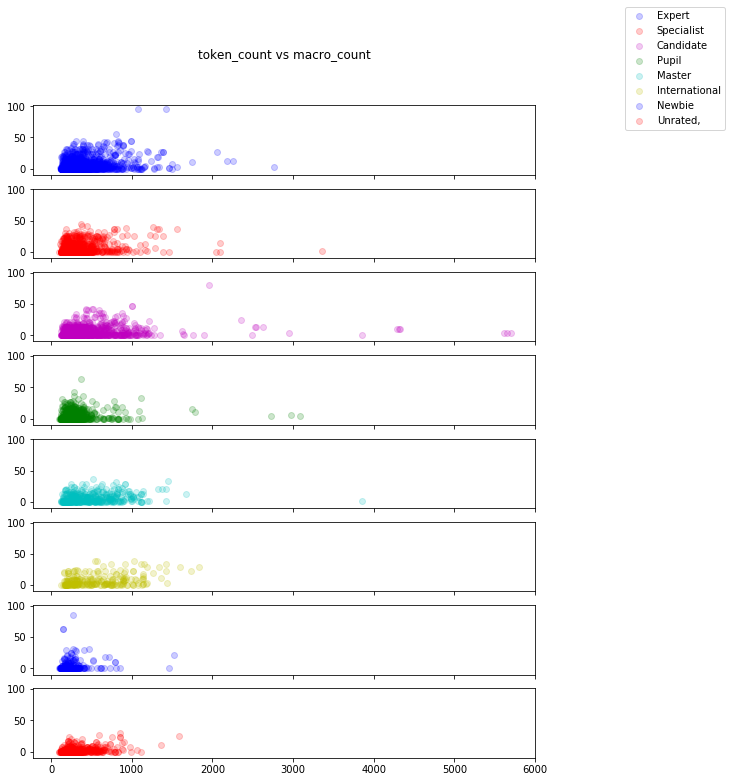

In [70]:
plot_data_2D_cat(token_count,macro_count,usertype,'token_count vs macro_count')

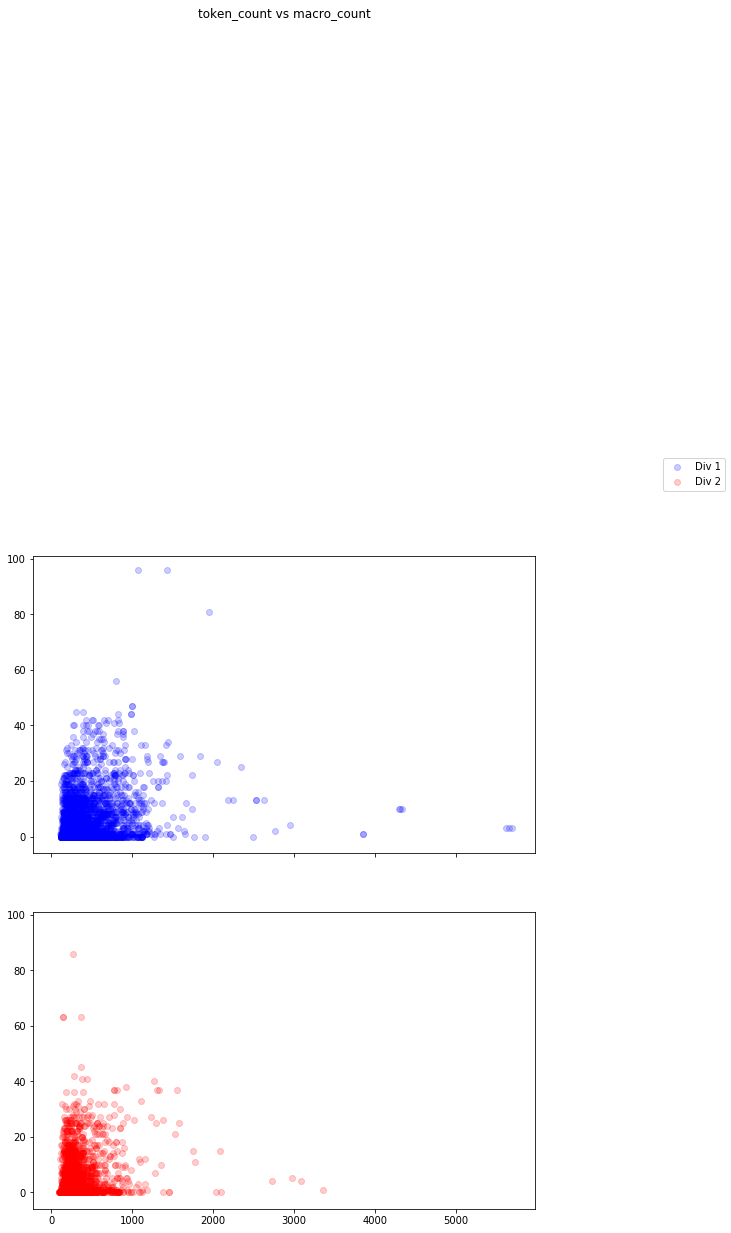

In [71]:
plot_data_2D_cat(token_count,macro_count,userdiv,'token_count vs macro_count')

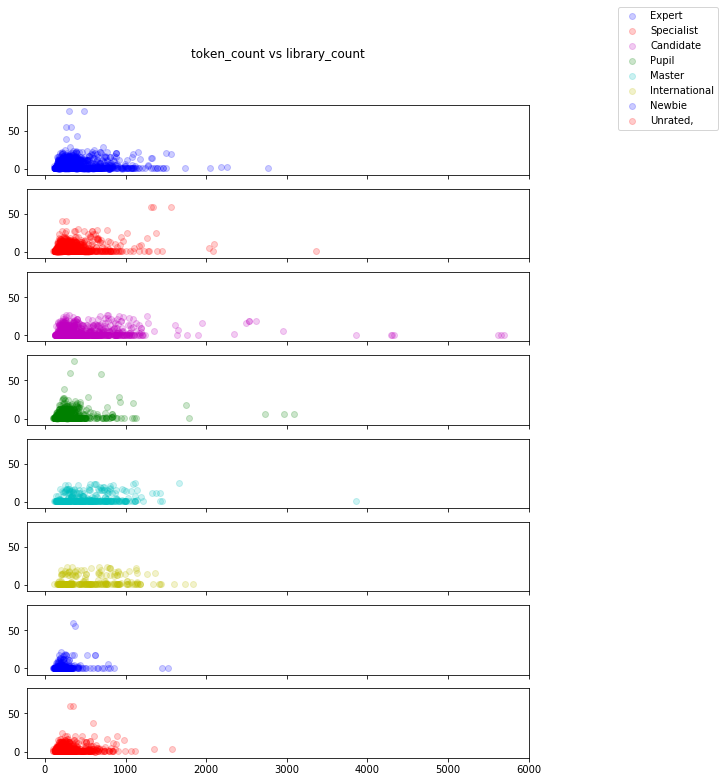

In [72]:
plot_data_2D_cat(token_count,library_count,usertype,'token_count vs library_count')

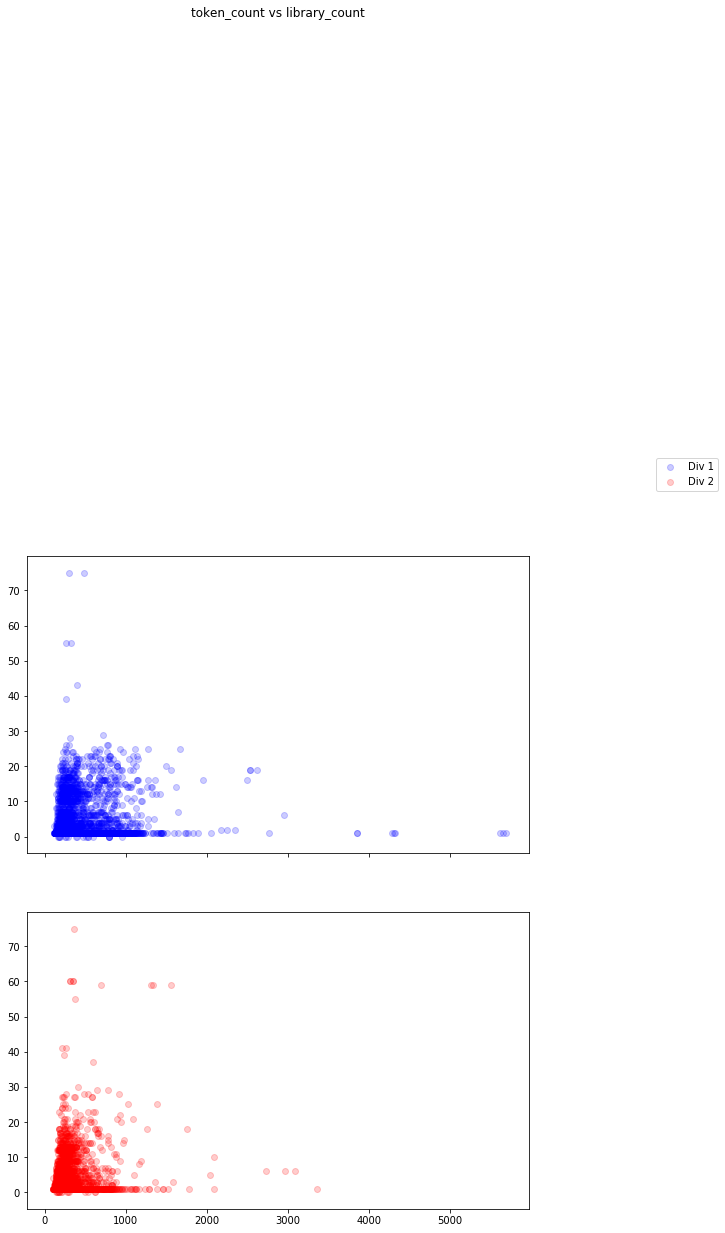

In [73]:
plot_data_2D_cat(token_count,library_count,userdiv,'token_count vs library_count')

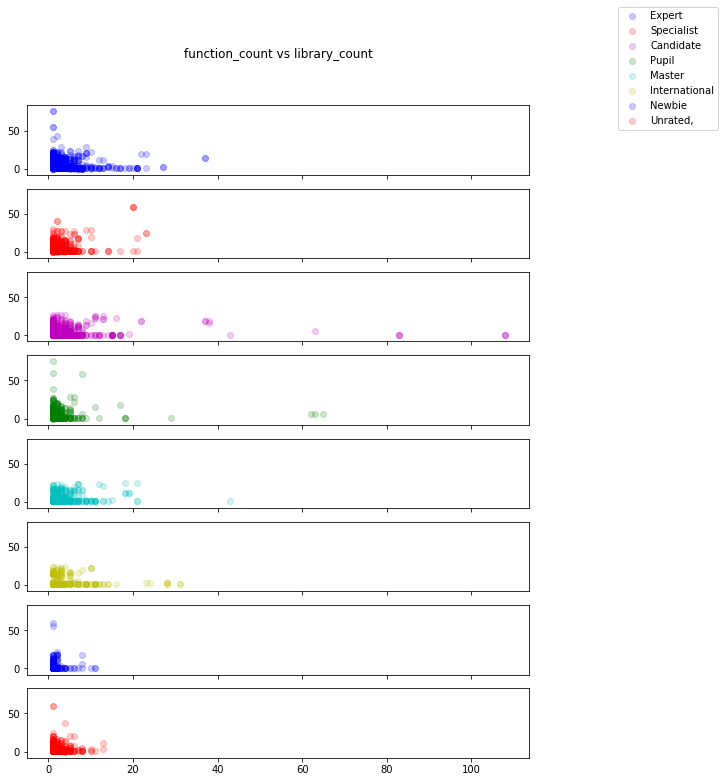

In [74]:
plot_data_2D_cat(function_count,library_count,usertype,'function_count vs library_count')

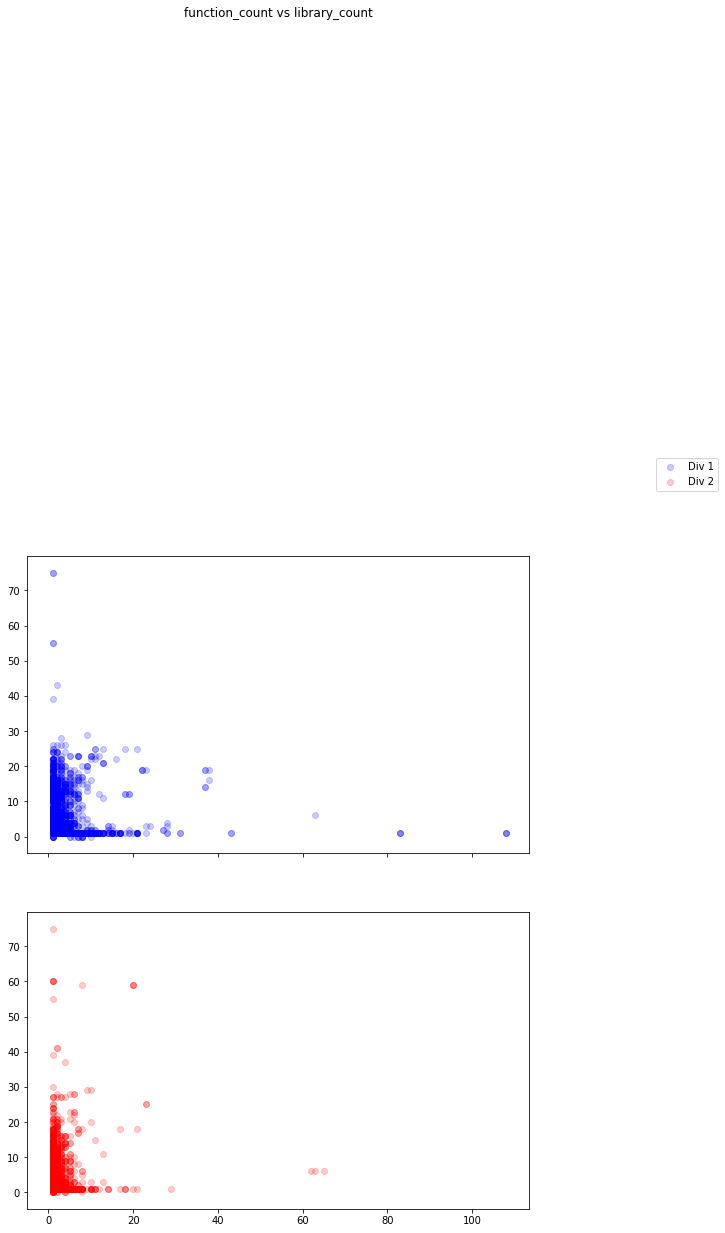

In [75]:
plot_data_2D_cat(function_count,library_count,userdiv,'function_count vs library_count')

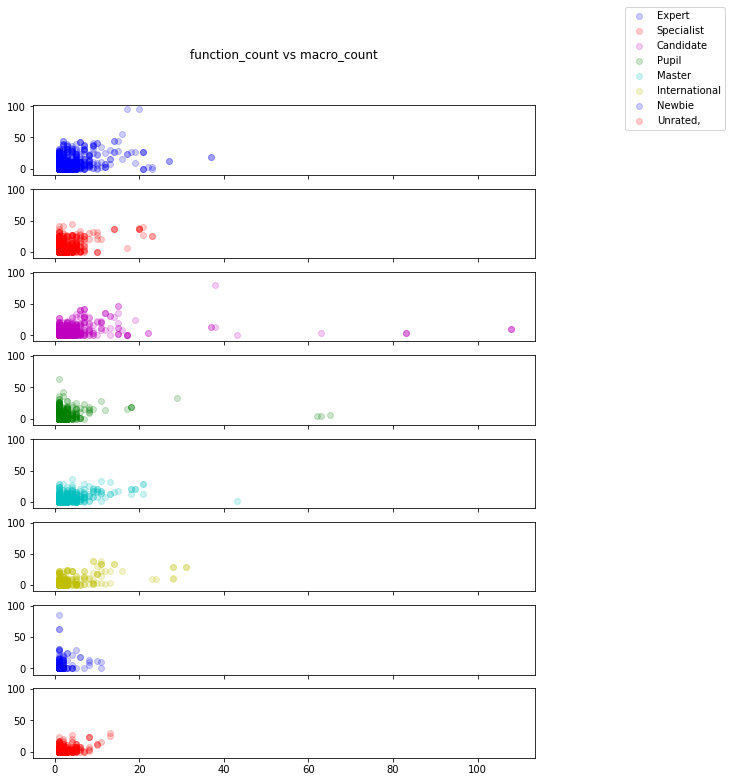

In [76]:
plot_data_2D_cat(function_count,macro_count,usertype,'function_count vs macro_count')

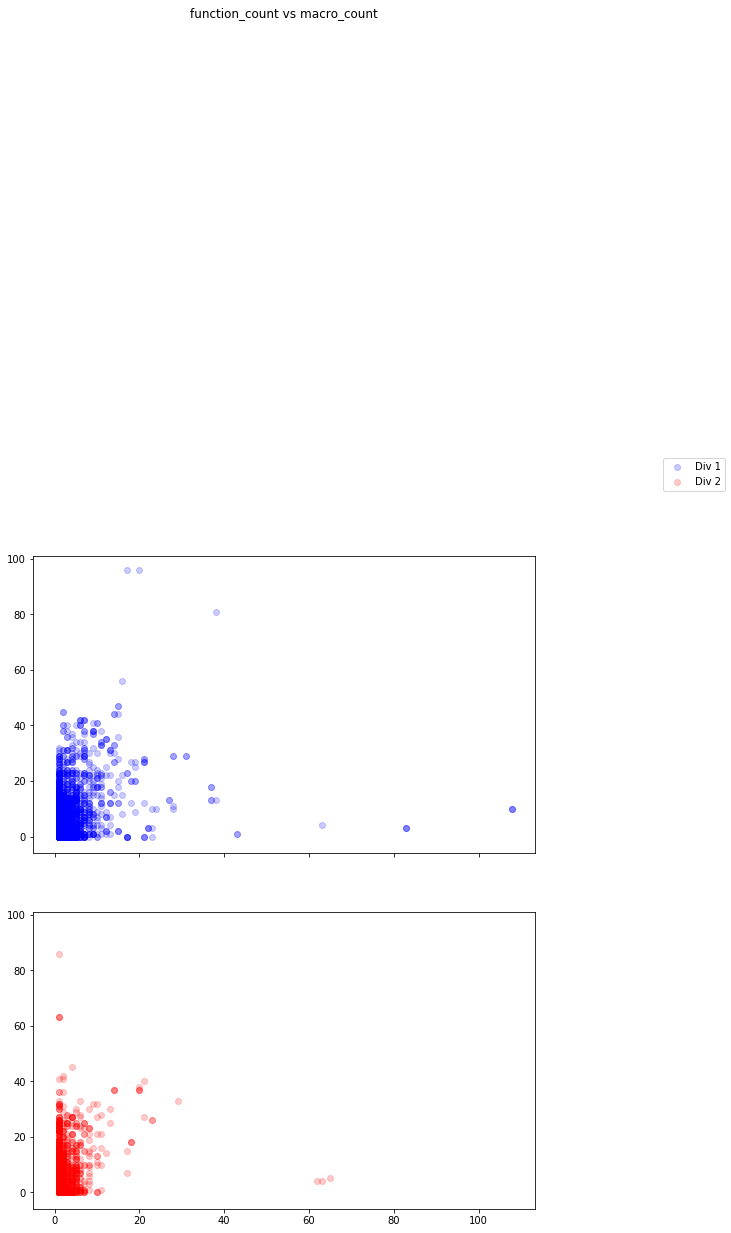

In [77]:
plot_data_2D_cat(function_count,macro_count,userdiv,'function_count vs macro_count')

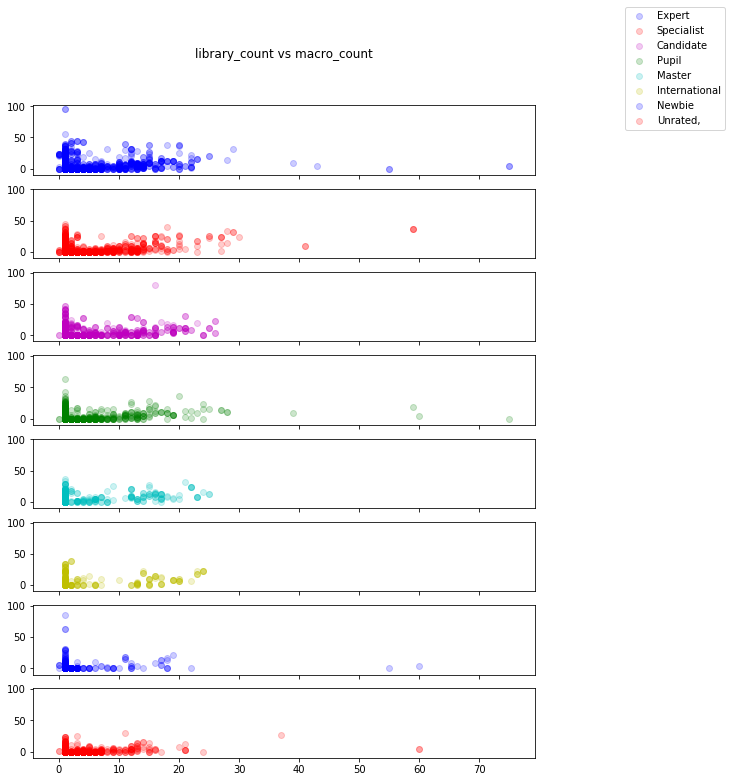

In [78]:
plot_data_2D_cat(library_count,macro_count,usertype,'library_count vs macro_count')

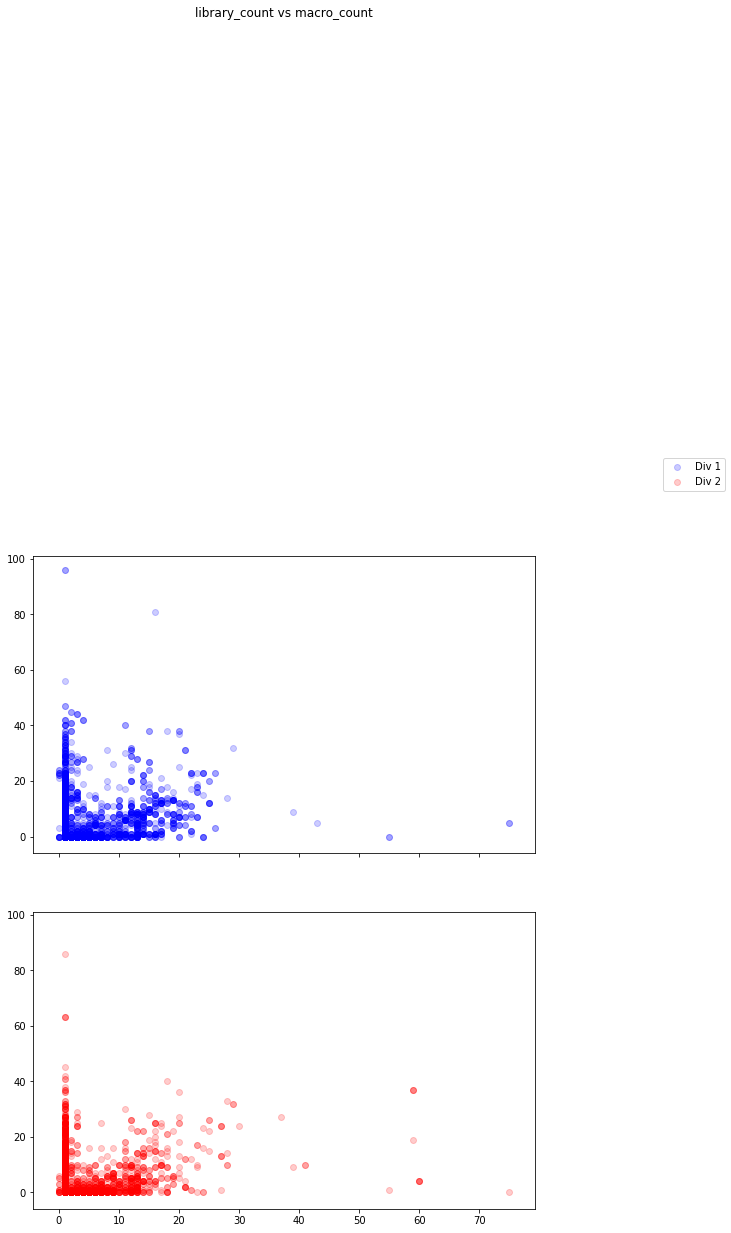

In [79]:
plot_data_2D_cat(library_count,macro_count,userdiv,'library_count vs macro_count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


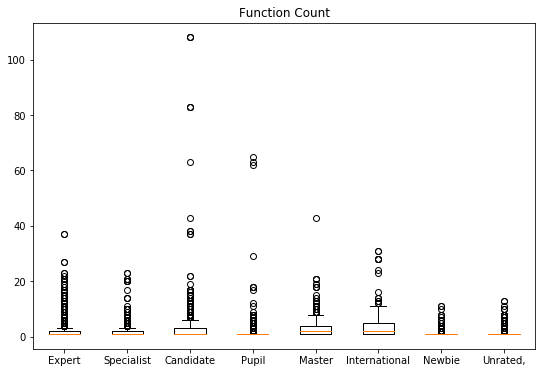

In [80]:
box_plot_cat(function_count,usertype,'Function Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


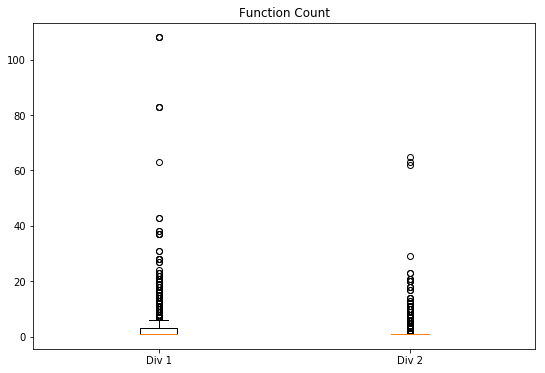

In [81]:
box_plot_cat(function_count,userdiv,'Function Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


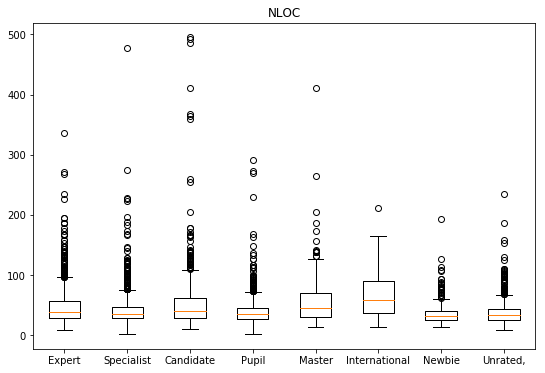

In [82]:
box_plot_cat(nloc,usertype,'NLOC')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


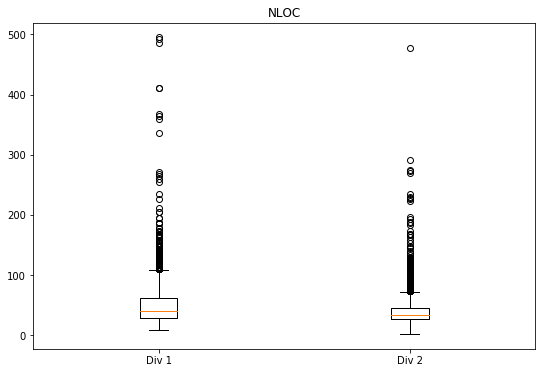

In [83]:
box_plot_cat(nloc,userdiv,'NLOC')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


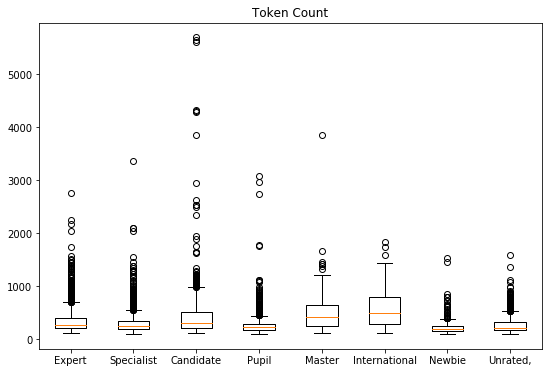

In [84]:
box_plot_cat(token_count,usertype,'Token Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


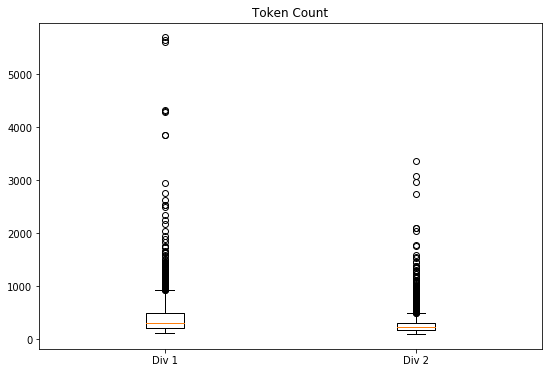

In [85]:
box_plot_cat(token_count,userdiv,'Token Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


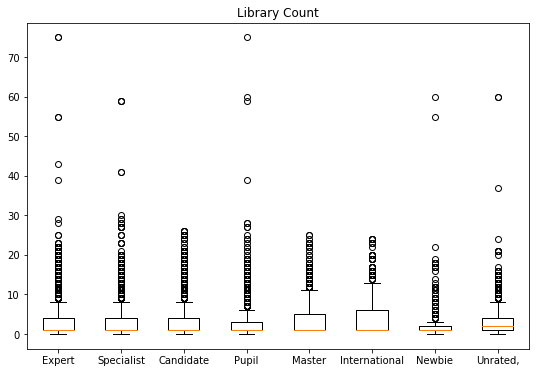

In [86]:
box_plot_cat(library_count,usertype,'Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


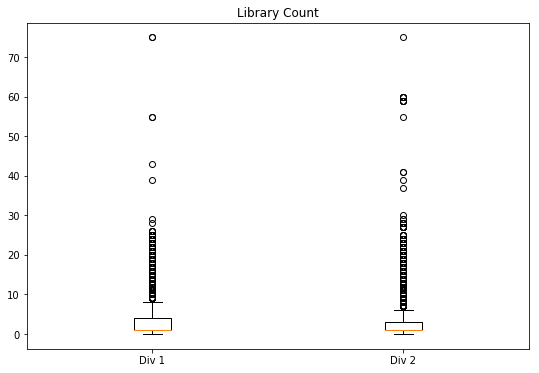

In [87]:
box_plot_cat(library_count,userdiv,'Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


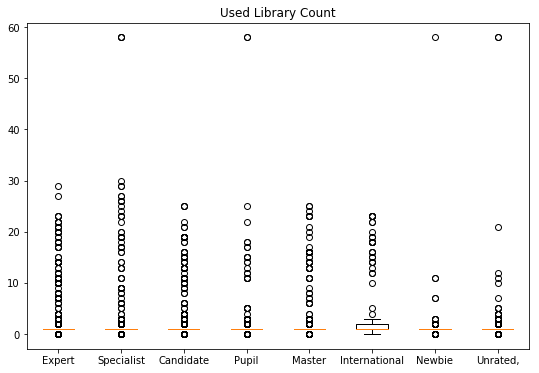

In [88]:
box_plot_cat(used_library,usertype,'Used Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


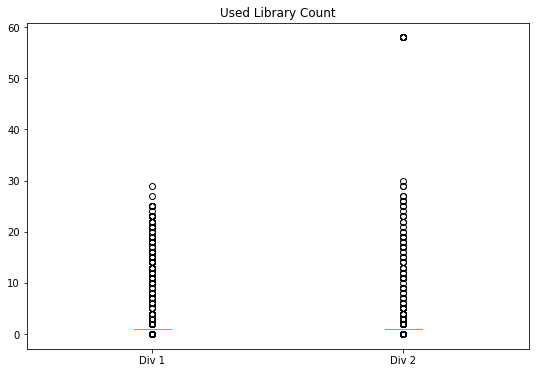

In [90]:
box_plot_cat(used_library,userdiv,'Used Library Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


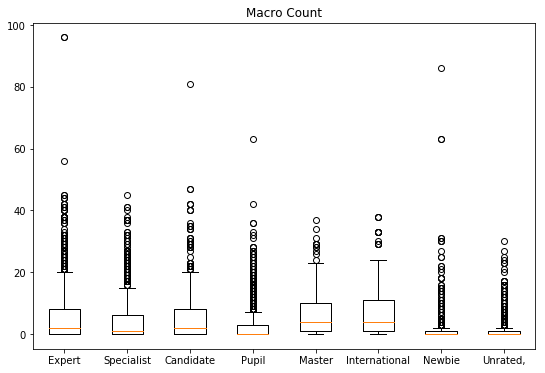

In [91]:
box_plot_cat(macro_count,usertype,'Macro Count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


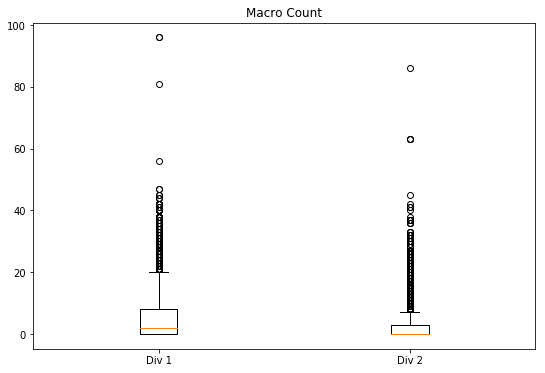

In [92]:
box_plot_cat(macro_count,userdiv,'Macro Count')